In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from prophet import Prophet

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


mae: 3326.0545462691766
RMSE: 4061.5283784387966


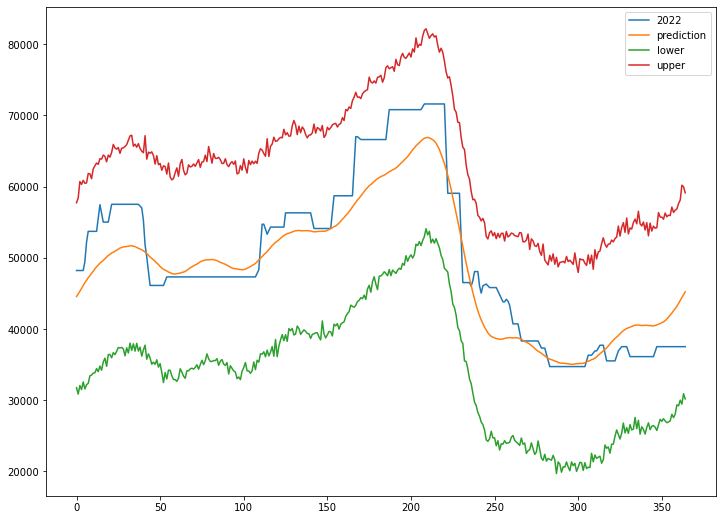

In [5]:
df = pd.read_csv('+22년se배_het.csv', encoding='cp949')
df['ds'] = pd.to_datetime(df['ds'])
test_df = df['y'].tail(365).reset_index(drop=True)

df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.003,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

future = model_het.make_future_dataframe(periods=365)
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
lower = forecast['yhat_lower'].tail(365).reset_index(drop=True)
upper = forecast['yhat_upper'].tail(365).reset_index(drop=True)


from sklearn.metrics import mean_absolute_error
print('mae:',mean_absolute_error(test_df, pred_het))
print('RMSE:', mean_squared_error(test_df, pred_het)**0.5)
# 모델 저장 코드
# import joblib
# joblib.dump(model_het, 'model/se_배_prophet15.pkl')

#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(df['y'].tail(365).reset_index(drop=True), label = '2022')
plt.plot(pred_het, label = 'prediction')
plt.plot(lower, label = 'lower')
plt.plot(upper, label = 'upper')
plt.legend()
plt.show()

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [92]:
df['ds'] = pd.to_datetime(df['ds'])

In [93]:
df

,ds,y
0,2013-01-01,59000.0
1,2013-01-02,59000.0
2,2013-01-03,59000.0
3,2013-01-04,59000.0
4,2013-01-05,59000.0
...,...,...
3282,2021-12-27,49030.0
3283,2021-12-28,49530.0
3284,2021-12-29,50030.0
3285,2021-12-30,50530.0


In [4]:
x=df.drop(columns='배가격')
y=df['배가격']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [5]:
train_x.shape

(2337, 7)

In [6]:
model_li = LinearRegression()
model_li.fit(train_x,train_y)

LinearRegression()

In [7]:
pred = model_li.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 11915.68702744179
0.31679


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [9]:
model_rf = RandomForestRegressor(n_estimators=200,max_depth=30, min_samples_leaf=1, min_samples_split=2,n_jobs=-1)
model_rf.fit(train_x,train_y)
pred = model_rf.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 1550.464674296536
0.98843


In [10]:
model_gb = ensemble.GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=10)
model_gb.fit(train_x,train_y)
pred = model_gb.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 1182.8880521653155
0.99327


In [11]:
train_x.shape

(2337, 7)

In [94]:
test_df = pd.read_csv('22_가격동향_배.csv',encoding='utf-8')
test_df = test_df.interpolate(method='linear')
test_df = test_df.fillna(method='bfill')
test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))
con_2022 = test_df[['일자','광주\n단위 (원)']].copy()
con_2022.rename(columns = {'일자' : 'ds','광주\n단위 (원)' : 'y'}, inplace = True)
df = pd.concat([df,con_2022]).reset_index(drop=True)
df.to_csv('train/+22년gw배_het.csv',encoding='cp949',index=False)
df

,ds,y
0,2013-01-01,59000.0
1,2013-01-02,59000.0
2,2013-01-03,59000.0
3,2013-01-04,59000.0
4,2013-01-05,59000.0
...,...,...
3647,2022-12-27,38500.0
3648,2022-12-28,38500.0
3649,2022-12-29,38500.0
3650,2022-12-30,38500.0


In [36]:
pred_rf = model_rf.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_rf)**0.5)
print(round(r2_score(test_df, pred_rf),5))

RMSE: 28673.1319227069
-5.53588


In [37]:
pred_gb = model_gb.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_gb)**0.5)
print(round(r2_score(test_df, pred_gb),5))

RMSE: 28917.217445285685
-5.64763


In [38]:
pred_lstm = model.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_lstm)**0.5)
print(round(r2_score(test_df, pred_lstm),5))

12/12 [==============================] - 0s 3ms/step
RMSE: 10568.748581052063
0.11203


In [83]:
import joblib
joblib.dump(model_het, 'se_배_prophet15.pkl')

['se_배_prophet15.pkl']

In [95]:
df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)

In [96]:
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.003,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

In [97]:
future = model_het.make_future_dataframe(periods=365)

In [98]:
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

In [99]:
forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
from sklearn.metrics import mean_absolute_error
#print('mae:',mean_absolute_error(test_df/15, pred_het/15))
#print('RMSE:', mean_squared_error(test_df/15, pred_het/15)**0.5)

In [100]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

,ds,yhat,yhat_lower,yhat_upper
3652,2023-01-01,49936.038126,36389.986933,63915.530677
3653,2023-01-02,50410.447531,36362.324984,63687.951849
3654,2023-01-03,50928.924522,37408.349222,65552.832751
3655,2023-01-04,51393.272465,37107.021308,65027.614773
3656,2023-01-05,51904.578665,38546.274205,66995.441304
...,...,...,...,...
4012,2023-12-27,51042.219165,37162.215028,64175.376034
4013,2023-12-28,51483.577070,37406.067894,65888.582723
4014,2023-12-29,51865.501095,38148.236036,65392.817593
4015,2023-12-30,52286.764307,38391.122962,64965.211993


In [102]:
pred2023 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365).reset_index(drop=True).copy()
pred2023.to_csv('gw_배_2023.csv',encoding='cp949',index=False)
import joblib
joblib.dump(model_het, 'model/gw_배_prophet15.pkl')

['model/gw_배_prophet15.pkl']

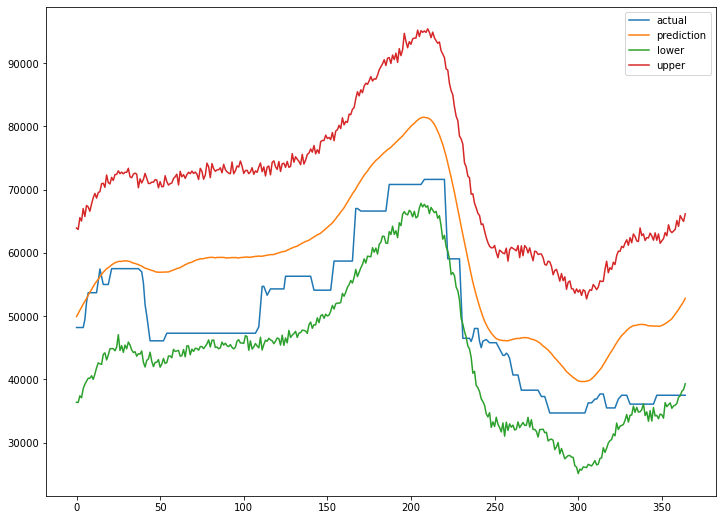

In [101]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df['광주\n단위 (원)'], label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.plot(forecast['yhat_lower'].tail(365).reset_index(drop=True), label = 'lower')
plt.plot(forecast['yhat_upper'].tail(365).reset_index(drop=True), label = 'upper')
plt.legend()
plt.show()

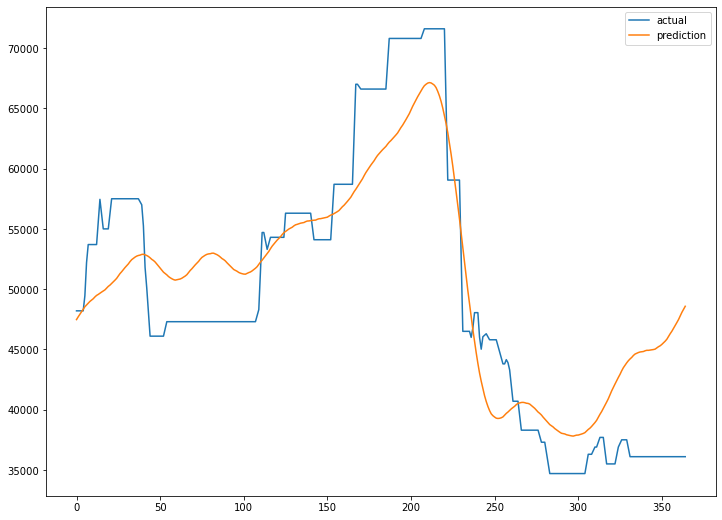

In [20]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.legend()
plt.show()

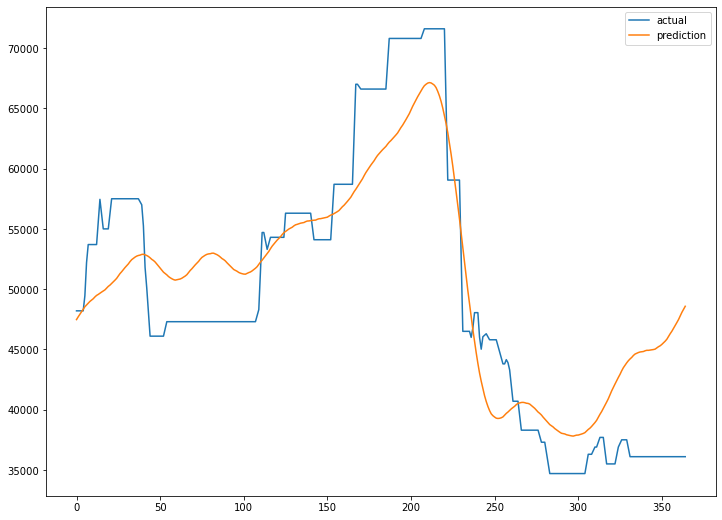

In [82]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.legend()
plt.show()

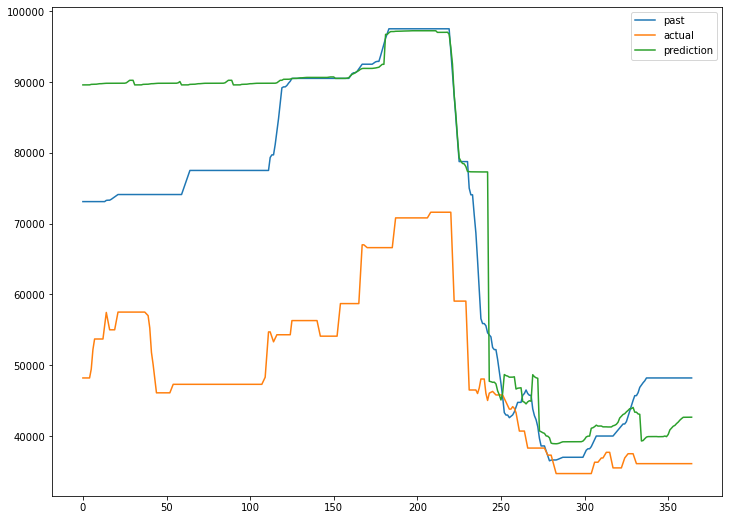

In [41]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_rf, label = 'prediction')
plt.legend()
plt.show()

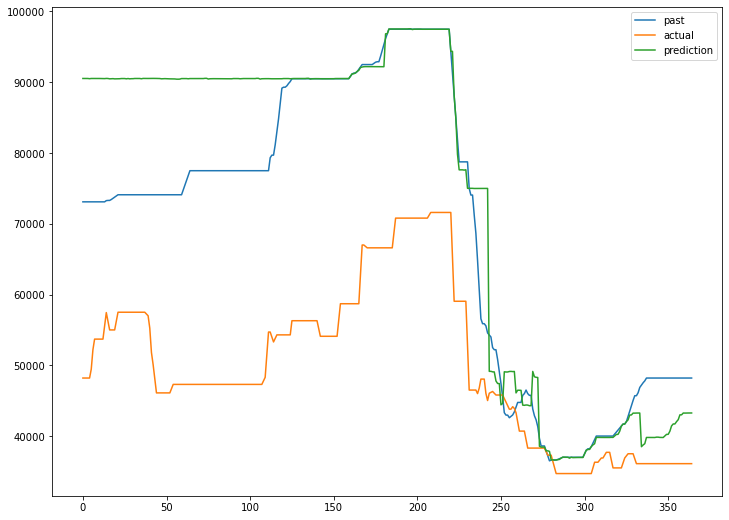

In [42]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_gb, label = 'prediction')
plt.legend()
plt.show()

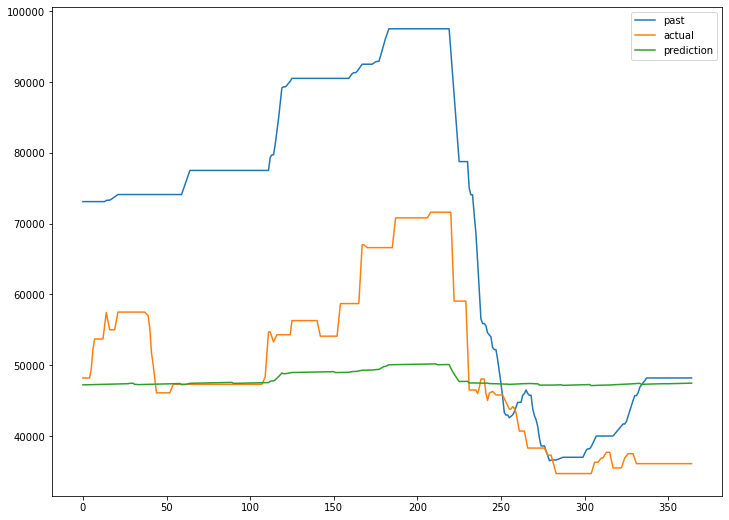

In [43]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_lstm, label = 'prediction')
plt.legend()
plt.show()